In [ ]:
#Deleting any previous kaggle.json file
!rm -rf ~/.kaggle


In [ ]:
#Uploading the real kaggle.json file
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#Moving it to the correct location with proper permissions
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Verifying your credentials
!kaggle datasets list -s santander


ref                                                                title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rymnikski/dataset-for-collaborative-filters                        Dataset for collaborative filters                     9500633  2016-12-22 21:20:13.100000           2382         37  0.8235294        
alvarolopez/tusbic                                                 Tusbic Santander                                      2832011  2018-03-21 17:52:51.343000            373         15  0.8235294        
lakshmi25npathi/santander-customer-transaction-prediction-dataset  Santander Customer Transaction Prediction Dataset   261798898  2019-05-24 06:17:57.770000           3901         51  0.588235

In [ ]:
# Downloading data directly in Colab
!kaggle competitions download -c santander-product-recommendation
!unzip santander-product-recommendation.zip

 95% 216M/228M [00:00<00:00, 579MB/s]
100% 228M/228M [00:00<00:00, 567MB/s]
Archive:  santander-product-recommendation.zip
  inflating: sample_submission.csv.zip  
  inflating: test_ver2.csv.zip       
  inflating: train_ver2.csv.zip      


In [ ]:
#Unzipping the inner CSV files
!unzip -o train_ver2.csv.zip
#Verifying that the files exist
!ls -lh



Archive:  train_ver2.csv.zip
  inflating: train_ver2.csv          
total 2.6G
-rw-r--r-- 1 root root   70 Dec  1 23:02 kaggle.json
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 2.3M Dec 11  2019 sample_submission.csv.zip
-rw-r--r-- 1 root root 229M Dec 11  2019 santander-product-recommendation.zip
-rw-r--r-- 1 root root  13M Dec 11  2019 test_ver2.csv.zip
-rwxrwxrwx 1 root root 2.2G Oct 27  2016 train_ver2.csv
-rw-r--r-- 1 root root 215M Dec 11  2019 train_ver2.csv.zip


In [ ]:
#Creating SQLite database and importing data
import pandas as pd
import sqlite3

# Connect to (or create) SQLite database
conn = sqlite3.connect("santander.db")

# IMPORTANT: Drop the existing table if it exists (to start fresh)
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS santander_train")
conn.commit()
print("✓ Dropped existing santander_train table (if it existed)\n")

# Load CSV in chunks to prevent memory overflow
chunksize = 50000  # Adjust based on Colab memory
csv_path = "train_ver2.csv"

# Your renaming dictionary (assuming this is defined elsewhere or will be defined before this cell runs)
column_rename_dict = {
    'fecha_dato': 'transaction_date',
    'ncodpers': 'customer_id',
    'ind_empleado': 'employment_status',
    'pais_residencia': 'residence_country',
    'sexo': 'gender',
    'age': 'age',
    'fecha_alta': 'first_join_date',
    'ind_nuevo': 'is_new_customer',
    'antiguedad': 'tenure_months',
    'indrel': 'primary_customer',
    'ult_fec_cli_1t': 'last_primary_date',
    'indrel_1mes': 'customer_type_start',
    'tiprel_1mes': 'relation_type_start',
    'indresi': 'residence_index',
    'indext': 'is_foreigner',
    'conyuemp': 'spouse_employee',
    'canal_entrada': 'channel_entrance',
    'indfall': 'is_deceased',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'activity_status',
    'renta': 'household_gross_income',
    'segmento': 'segment',
    'ind_ahor_fin_ult1': 'saving_account',
    'ind_aval_fin_ult1': 'guarantees',
    'ind_cco_fin_ult1': 'current_account',
    'ind_cder_fin_ult1': 'derivatives',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposits',
    'ind_deme_fin_ult1': 'medium_term_deposits',
    'ind_dela_fin_ult1': 'long_term_deposits',
    'ind_ecue_fin_ult1': 'e_account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'taxes',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'payroll',
    'ind_nom_pens_ult1': 'pension_2',
    'ind_recibo_ult1': 'direct_debit'
}


for chunk in pd.read_csv(csv_path, chunksize=chunksize):
    # Rename columns in the chunk
    chunk.rename(columns=column_rename_dict, inplace=True) # Added inplace=True for direct modification
    chunk.to_sql("santander_train", conn, if_exists="append", index=False)
    print(f"Inserted {len(chunk)} rows...")

conn.close()
print("Data successfully loaded into SQLite database.")

✓ Dropped existing santander_train table (if it existed)



/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (5,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,12,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,12,16,23) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...
Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 50000 rows...


/tmp/ipython-input-1565163818.py:71: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(csv_path, chunksize=chunksize):


Inserted 47309 rows...
Data successfully loaded into SQLite database.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset"

Mounted at /content/drive
customer.csv	  customer_test.parquet   transaction.csv
customer.parquet  final_features.parquet  transaction.parquet


In [ ]:
!find "/content/drive/My Drive" -name "customer.parquet"


/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet


In [ ]:
#LOAD CUSTOMER IDs FROM customer.csv
# ========================================
customer_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet')
valid_customer_ids = customer_df['customer_id'].tolist()

print(f"✓ Loaded {len(valid_customer_ids):,} customer IDs from customer.parquet")
print(f"  Sample IDs: {valid_customer_ids[:10]}")

✓ Loaded 159,288 customer IDs from customer.parquet
  Sample IDs: [15891, 15899, 15900, 15902, 15906, 15910, 15915, 15916, 15918, 15919]


In [ ]:
conn = sqlite3.connect("santander.db")

# Create WHERE clause for SQL query
customer_id_list = ','.join(map(str, valid_customer_ids))

query = f"""
SELECT
  customer_id,
  transaction_date,
  saving_account,
  guarantees,
  current_account,
  derivatives,
  payroll_account,
  junior_account,
  mas_particular_account,
  particular_account,
  particular_plus_account,
  short_term_deposits,
  medium_term_deposits,
  long_term_deposits,
  e_account,
  funds,
  mortgage,
  pensions,
  loans,
  taxes,
  credit_card,
  securities,
  home_account,
  payroll,
  pension_2,
  direct_debit
FROM santander_train
WHERE customer_id IN ({customer_id_list})
ORDER BY customer_id, transaction_date

"""

print(f"\n✓ Loading data for {len(valid_customer_ids):,} customers from database...")
df = pd.read_sql(query, conn)
conn.close()

print(f"✓ Loaded {len(df):,} monthly snapshots")
print(f"  Unique customers: {df['customer_id'].nunique():,}")
print(f"  Date range: {df['transaction_date'].min()} to {df['transaction_date'].max()}")


✓ Loading data for 159,288 customers from database...
✓ Loaded 2,504,237 monthly snapshots
  Unique customers: 159,288
  Date range: 2015-01-28 to 2016-05-28


In [ ]:
print("="*60)
print("STEP 1: DATA LOADED")
print("="*60)
print(f"Original shape: {df.shape}")
print(f"Original columns ({len(df.columns)}): {df.columns.tolist()}")

df.head(100)

STEP 1: DATA LOADED
Original shape: (2504237, 26)
Original columns (26): ['customer_id', 'transaction_date', 'saving_account', 'guarantees', 'current_account', 'derivatives', 'payroll_account', 'junior_account', 'mas_particular_account', 'particular_account', 'particular_plus_account', 'short_term_deposits', 'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds', 'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities', 'home_account', 'payroll', 'pension_2', 'direct_debit']


,customer_id,transaction_date,saving_account,guarantees,current_account,derivatives,payroll_account,junior_account,mas_particular_account,particular_account,...,mortgage,pensions,loans,taxes,credit_card,securities,home_account,payroll,pension_2,direct_debit
0,15891,2015-07-28,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,15891,2015-08-28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,15899,2015-01-28,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0.0,0.0,1
3,15899,2015-02-28,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0.0,0.0,1
4,15899,2015-03-28,0,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,15916,2015-04-28,0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,0.0,0.0,1
96,15916,2015-05-28,0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,0.0,0.0,1
97,15916,2015-06-28,0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,0.0,0.0,1
98,15916,2015-07-28,0,0,0,0,1,0,0,0,...,0,1,0,1,1,1,0,0.0,0.0,1


In [ ]:
# ========================================
# STEP 1: DETECT PRODUCT CHANGES (TRANSACTIONS)
# Core logic: Track when customers ADD or CANCEL products
# ========================================
print("\n" + "="*80)
print("STEP 1: DETECTING PRODUCT CHANGES")
print("="*80)

import pandas as pd
import numpy as np

# Define all product columns from your data
product_columns = [
    'saving_account', 'guarantees', 'current_account', 'derivatives',
    'payroll_account', 'junior_account', 'mas_particular_account',
    'particular_account', 'particular_plus_account', 'short_term_deposits',
    'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds',
    'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
    'home_account', 'payroll', 'pension_2', 'direct_debit'
]

# Sort by customer and date
df = df.sort_values(['customer_id', 'transaction_date']).reset_index(drop=True)

# Initialize transaction storage
all_transactions = []
transaction_id = 1

# Loop through each product to detect changes
for product in product_columns:
    if product not in df.columns:
        print(f"  ⚠ Skipping {product} - not in dataset")
        continue

    # Get previous month's value for each customer
    df[f'{product}_prev'] = df.groupby('customer_id')[product].shift(1).fillna(0)

    # Calculate change: 1 = NEW, -1 = CANCEL, 0 = NO CHANGE
    df[f'{product}_change'] = df[product] - df[f'{product}_prev']

    # Extract NEW PURCHASES (change = 1)
    new_purchases = df[df[f'{product}_change'] == 1].copy()

    for _, row in new_purchases.iterrows():
        all_transactions.append({
            'transaction_id': transaction_id,
            'customer_id': row['customer_id'],
            'transaction_date': row['transaction_date'],
            'product_name': product,
            'transaction_type': 'PURCHASE',
            'has_product': 1
        })
        transaction_id += 1

    # Extract CANCELLATIONS (change = -1)
    cancellations = df[df[f'{product}_change'] == -1].copy()

    for _, row in cancellations.iterrows():
        all_transactions.append({
            'transaction_id': transaction_id,
            'customer_id': row['customer_id'],
            'transaction_date': row['transaction_date'],
            'product_name': product,
            'transaction_type': 'CANCELLATION',
            'has_product': 0
        })
        transaction_id += 1

    print(f"  ✓ {product}: {len(new_purchases)} purchases, {len(cancellations)} cancellations")

# Create transaction dataframe
trans_df = pd.DataFrame(all_transactions)

print(f"\n✓ Product change detection complete")
print(f"  Total transactions: {len(trans_df):,}")
print(f"  Unique customers: {trans_df['customer_id'].nunique():,}")



STEP 1: DETECTING PRODUCT CHANGES
  ✓ saving_account: 68 purchases, 10 cancellations
  ✓ guarantees: 13 purchases, 6 cancellations
  ✓ current_account: 94821 purchases, 13502 cancellations
  ✓ derivatives: 206 purchases, 66 cancellations
  ✓ payroll_account: 30497 purchases, 6552 cancellations
  ✓ junior_account: 368 purchases, 340 cancellations
  ✓ mas_particular_account: 989 purchases, 650 cancellations
  ✓ particular_account: 59392 purchases, 5160 cancellations
  ✓ particular_plus_account: 14322 purchases, 2248 cancellations
  ✓ short_term_deposits: 443 purchases, 282 cancellations
  ✓ medium_term_deposits: 706 purchases, 274 cancellations
  ✓ long_term_deposits: 15598 purchases, 5945 cancellations
  ✓ e_account: 26278 purchases, 2291 cancellations
  ✓ funds: 7887 purchases, 1175 cancellations
  ✓ mortgage: 3598 purchases, 384 cancellations
  ✓ pensions: 4918 purchases, 381 cancellations
  ✓ loans: 533 purchases, 105 cancellations
  ✓ taxes: 20030 purchases, 5 cancellations
  ✓ cre

In [ ]:
# Based on Kaggle competition description and banking standards
official_categories = {
    # SAVINGS & DEPOSITS
    'ind_ahor_fin_ult1': {
        'name': 'Saving Account',
        'category': 'Savings',
        'reasoning': 'Primary savings product - standard bank savings account'
    },
    'ind_dela_fin_ult1': {
        'name': 'Long-term Deposits',
        'category': 'Investment',
        'reasoning': 'Fixed-term deposit investment product'
    },
    'ind_deme_fin_ult1': {
        'name': 'Medium-term Deposits',
        'category': 'Investment',
        'reasoning': 'Medium-term investment deposit'
    },
    'ind_deco_fin_ult1': {
        'name': 'Short-term Deposits',
        'category': 'Investment',
        'reasoning': 'Short-term investment deposit'
    },
    # TRANSACTION ACCOUNTS
    'ind_cco_fin_ult1': {
        'name': 'Current Account',
        'category': 'Transaction',
        'reasoning': 'Checking/current account for daily transactions'
    },
    'ind_cno_fin_ult1': {
        'name': 'Payroll Account',
        'category': 'Transaction',
        'reasoning': 'Linked to salary payments'
    },
    'ind_ctop_fin_ult1': {
        'name': 'Particular Account',
        'category': 'Transaction',
        'reasoning': 'Personal transaction account'
    },
    'ind_ctma_fin_ult1': {
        'name': 'Mas Particular Account',
        'category': 'Transaction',
        'reasoning': 'Enhanced personal account'
    },
    # CREDIT PRODUCTS
    'ind_tjcr_fin_ult1': {
        'name': 'Credit Card',
        'category': 'Credit',
        'reasoning': 'Revolving credit product'
    },

    # LOAN PRODUCTS
    'ind_pres_fin_ult1': {
        'name': 'Loans',
        'category': 'Loan',
        'reasoning': 'Personal loans - customer borrows money'
    },
    'ind_hip_fin_ult1': {
        'name': 'Mortgage',
        'category': 'Loan',
        'reasoning': 'Home mortgage - largest loan product'
    },
        # RETIREMENT PRODUCTS
    'ind_plan_fin_ult1': {
        'name': 'Pensions',
        'category': 'Retirement',
        'reasoning': 'Pension plan for retirement savings'
    },
    'ind_nom_pens_ult1': {
        'name': 'Pensions (Payroll)',
        'category': 'Retirement',
        'reasoning': 'Payroll-linked pension'
    },

    # INVESTMENT PRODUCTS
    'ind_fond_fin_ult1': {
        'name': 'Funds',
        'category': 'Investment',
        'reasoning': 'Investment funds (mutual funds)'
    },
    'ind_valo_fin_ult1': {
        'name': 'Securities',
        'category': 'Investment',
        'reasoning': 'Stock/securities trading'
    },
    'ind_cder_fin_ult1': {
        'name': 'Derivatives',
        'category': 'Investment',
        'reasoning': 'Advanced investment products'
    },
    # SERVICES
    'ind_recibo_ult1': {
        'name': 'Direct Debit',
        'category': 'Service',
        'reasoning': 'Payment service - bills auto-pay'
    },
    'ind_nomina_ult1': {
        'name': 'Payroll',
        'category': 'Service',
        'reasoning': 'Payroll service'
    },
    'ind_reca_fin_ult1': {
        'name': 'Taxes',
        'category': 'Service',
        'reasoning': 'Tax payment service'
    },
    'ind_aval_fin_ult1': {
        'name': 'Guarantees',
        'category': 'Service',
        'reasoning': 'Guarantee/collateral service'
    }
}

for product, info in official_categories.items():
    print(f"\n{product}")
    print(f"  Name: {info['name']}")
    print(f"  Category: {info['category']}")
    print(f"  Reasoning: {info['reasoning']}")



ind_ahor_fin_ult1
  Name: Saving Account
  Category: Savings
  Reasoning: Primary savings product - standard bank savings account

ind_dela_fin_ult1
  Name: Long-term Deposits
  Category: Investment
  Reasoning: Fixed-term deposit investment product

ind_deme_fin_ult1
  Name: Medium-term Deposits
  Category: Investment
  Reasoning: Medium-term investment deposit

ind_deco_fin_ult1
  Name: Short-term Deposits
  Category: Investment
  Reasoning: Short-term investment deposit

ind_cco_fin_ult1
  Name: Current Account
  Category: Transaction
  Reasoning: Checking/current account for daily transactions

ind_cno_fin_ult1
  Name: Payroll Account
  Category: Transaction
  Reasoning: Linked to salary payments

ind_ctop_fin_ult1
  Name: Particular Account
  Category: Transaction
  Reasoning: Personal transaction account

ind_ctma_fin_ult1
  Name: Mas Particular Account
  Category: Transaction
  Reasoning: Enhanced personal account

ind_tjcr_fin_ult1
  Name: Credit Card
  Category: Credit
  Reas

In [ ]:
 #VALIDATE USING PRODUCT CORRELATIONS
# ========================================
print("\n" + "="*80)
print("2. VALIDATE CATEGORIES USING PRODUCT CORRELATIONS")
print("-"*80)

from google.colab import drive
drive.mount('/content/drive')

# Step 2: Create the directory structure if it doesn't exist
import os

# Define the full path
save_path = '/content/drive/My Drive/DSC678-Capstone/Banking_Project/project_dataset/'

# Create directories if they don't exist
os.makedirs(save_path, exist_ok=True)
print(f"✓ Directory created/verified: {save_path}")

# Step 3: Save the DataFrame
df.to_parquet(save_path + 'transaction.parquet', index=True)
print(f"✓ File saved successfully!")

# Check product co-occurrence patterns
# Products in same category should be correlated
# Get product columns (use the RENAMED columns from your DataFrame)
product_cols = [
    'saving_account', 'guarantees', 'current_account', 'derivatives',
    'payroll_account', 'junior_account', 'mas_particular_account',
    'particular_account', 'particular_plus_account', 'short_term_deposits',
    'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds',
    'mortgage', 'pensions', 'loans', 'taxes', 'credit_card', 'securities',
    'home_account', 'payroll', 'pension_2', 'direct_debit'
]

# Check which columns actually exist in your dataframe
available_product_cols = [col for col in product_cols if col in df.columns]
print(f"Found {len(available_product_cols)} product columns in dataframe")

# Calculate correlation matrix with existing columns only
correlation_matrix = df[available_product_cols].corr()





2. VALIDATE CATEGORIES USING PRODUCT CORRELATIONS
--------------------------------------------------------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Directory created/verified: /content/drive/My Drive/DSC678-Capstone/Banking_Project/project_dataset/
✓ File saved successfully!
Found 24 product columns in dataframe


In [ ]:
# Savings products should correlate (FIXED: Use renamed columns)
savings_products = ['saving_account', 'home_account']
if all(col in df.columns for col in savings_products):
    print(f"\nSavings products correlation:")
    print(correlation_matrix.loc[savings_products, savings_products])
else:
    print(f"\n⚠ Some savings products not found in data")

# Loan products should correlate (FIXED: Use renamed columns)
loan_products = ['loans', 'mortgage']
if all(col in df.columns for col in loan_products):
    print(f"\nLoan products correlation:")
    print(correlation_matrix.loc[loan_products, loan_products])
else:
    print(f"\n⚠ Some loan products not found in data")

# Transaction accounts should correlate (FIXED: Use renamed columns)
transaction_accounts = ['current_account', 'payroll_account', 'particular_account']
if all(col in df.columns for col in transaction_accounts):
    print(f"\nTransaction accounts correlation:")
    print(correlation_matrix.loc[transaction_accounts, transaction_accounts])
else:
    print(f"\n⚠ Some transaction accounts not found in data")

# Investment products should correlate (FIXED: Use renamed columns)
investment_products = ['funds', 'securities', 'short_term_deposits', 'long_term_deposits']
existing_investments = [col for col in investment_products if col in df.columns]
if len(existing_investments) >= 2:
    print(f"\nInvestment products correlation:")
    print(correlation_matrix.loc[existing_investments, existing_investments])
else:
    print(f"\n⚠ Not enough investment products for correlation")


Savings products correlation:
                saving_account  home_account
saving_account        1.000000      0.013921
home_account          0.013921      1.000000

Loan products correlation:
             loans  mortgage
loans     1.000000  0.007888
mortgage  0.007888  1.000000

Transaction accounts correlation:
                    current_account  payroll_account  particular_account
current_account            1.000000        -0.345746            0.184917
payroll_account           -0.345746         1.000000           -0.072189
particular_account         0.184917        -0.072189            1.000000

Investment products correlation:
                        funds  securities  short_term_deposits  \
funds                1.000000    0.181100             0.011303   
securities           0.181100    1.000000             0.002166   
short_term_deposits  0.011303    0.002166             1.000000   
long_term_deposits   0.182956    0.084393             0.039248   

                     long_t

In [ ]:
# ========================================
# PRODUCT METADATA - SPAIN BANKING VALUES (IN EUROS)
# Based on Spanish banking industry standards 2015-2025
# ========================================

product_metadata = {
    # TRANSACTION ACCOUNTS (Cuentas Corrientes/Transaccionales)
    'current_account': {
        'category': 'Transaction',
        'type': 'Current Account',
        'base_value': 300,  # €300 typical minimum balance
        'currency': 'EUR'
    },
    'payroll_account': {
        'category': 'Transaction',
        'type': 'Payroll Account',
        'base_value': 600,  # €600 average payroll account balance
        'currency': 'EUR'
    },
    'particular_account': {
        'category': 'Transaction',
        'type': 'Particular Account',
        'base_value': 400,  # €400 average
        'currency': 'EUR'
    },
    'mas_particular_account': {
        'category': 'Transaction',
        'type': 'Mas Particular Account',
        'base_value': 500,  # €500 (enhanced account)
        'currency': 'EUR'
    },
    'particular_plus_account': {
        'category': 'Transaction',
        'type': 'Particular Plus Account',
        'base_value': 700,  # €700 (premium account)
        'currency': 'EUR'
    },

    # SAVINGS ACCOUNTS (Cuentas de Ahorro)
    'saving_account': {
        'category': 'Savings',
        'type': 'Savings Account',
        'base_value': 1500,  # €1,500 typical savings balance
        'currency': 'EUR'
    },
    'junior_account': {
        'category': 'Savings',
        'type': 'Junior Account',
        'base_value': 250,  # €250 (children's account)
        'currency': 'EUR'
    },
    'home_account': {
        'category': 'Savings',
        'type': 'Home Account',
        'base_value': 2000,  # €2,000 (home savings)
        'currency': 'EUR'
    },

    # INVESTMENT PRODUCTS (Productos de Inversión)
    'short_term_deposits': {
        'category': 'Investment',
        'type': 'Short-term Deposit',
        'base_value': 3000,  # €3,000 (3-6 months)
        'currency': 'EUR'
    },
    'medium_term_deposits': {
        'category': 'Investment',
        'type': 'Medium-term Deposit',
        'base_value': 5000,  # €5,000 (6-12 months)
        'currency': 'EUR'
    },
    'long_term_deposits': {
        'category': 'Investment',
        'type': 'Long-term Deposit',
        'base_value': 10000,  # €10,000 (1+ years)
        'currency': 'EUR'
    },
    'funds': {
        'category': 'Investment',
        'type': 'Investment Fund',
        'base_value': 6000,  # €6,000 (mutual funds)
        'currency': 'EUR'
    },
    'securities': {
        'category': 'Investment',
        'type': 'Securities',
        'base_value': 8000,  # €8,000 (stocks/bonds)
        'currency': 'EUR'
    },
    'derivatives': {
        'category': 'Investment',
        'type': 'Derivatives',
        'base_value': 15000,  # €15,000 (advanced products)
        'currency': 'EUR'
    },

    # CREDIT PRODUCTS (Productos de Crédito)
    'credit_card': {
        'category': 'Credit',
        'type': 'Credit Card',
        'base_value': 1200,  # €1,200 average credit limit
        'currency': 'EUR'
    },

    # LOAN PRODUCTS (Préstamos)
    'loans': {
        'category': 'Loan',
        'type': 'Personal Loan',
        'base_value': 12000,  # €12,000 average personal loan (Spain)
        'currency': 'EUR'
    },
    'mortgage': {
        'category': 'Loan',
        'type': 'Mortgage',
        'base_value': 120000,  # €120,000 average mortgage (Spain 2015-2025)
        'currency': 'EUR'
    },

    # RETIREMENT PRODUCTS (Productos de Jubilación)
    'pensions': {
        'category': 'Retirement',
        'type': 'Pension Plan',
        'base_value': 3500,  # €3,500 annual contribution
        'currency': 'EUR'
    },
    'pension_2': {
        'category': 'Retirement',
        'type': 'Pension (Payroll)',
        'base_value': 3000,  # €3,000 employer pension
        'currency': 'EUR'
    },

    # DIGITAL PRODUCTS (Productos Digitales)
    'e_account': {
        'category': 'Digital',
        'type': 'E-Account',
        'base_value': 100,  # €100 (digital-only account)
        'currency': 'EUR'
    },

    # SERVICES (Servicios)
    'direct_debit': {
        'category': 'Service',
        'type': 'Direct Debit',
        'base_value': 0,  # €0 (free service, but keep for tracking)
        'currency': 'EUR'
    },
    'payroll': {
        'category': 'Service',
        'type': 'Payroll Service',
        'base_value': 0,  # €0 (free service)
        'currency': 'EUR'
    },
    'taxes': {
        'category': 'Service',
        'type': 'Tax Payment',
        'base_value': 0,  # €0 (payment service, not a product value)
        'currency': 'EUR'
    },
    'guarantees': {
        'category': 'Service',
        'type': 'Guarantees',
        'base_value': 500,  # €500 (guarantee deposit)
        'currency': 'EUR'
    }
}

print("✓ Product metadata loaded")
print(f"  Total products: {len(product_metadata)}")
print(f"  Currency: EUR (Euros)")
print("\nSample product values (in Euros):")
for product in ['current_account', 'saving_account', 'mortgage', 'loans', 'credit_card']:
    val = product_metadata[product]['base_value']
    print(f"  {product:20} → €{val:,}")


✓ Product metadata loaded
  Total products: 24
  Currency: EUR (Euros)

Sample product values (in Euros):
  current_account      → €300
  saving_account       → €1,500
  mortgage             → €120,000
  loans                → €12,000
  credit_card          → €1,200


In [ ]:
# ========================================
# CALCULATE TRANSACTION AMOUNTS (EURO VALUES)
# ========================================
print("\n" + "="*80)
print("CALCULATING TRANSACTION AMOUNTS (EUROS)")
print("="*80)

# Add metadata columns
trans_df['product_category'] = trans_df['product_name'].map(
    lambda x: product_metadata.get(x, {}).get('category', 'Other')
)
trans_df['product_type'] = trans_df['product_name'].map(
    lambda x: product_metadata.get(x, {}).get('type', 'Unknown')
)
trans_df['base_amount'] = trans_df['product_name'].map(
    lambda x: product_metadata.get(x, {}).get('base_value', 0)
)
trans_df['currency'] = 'EUR'  # All amounts in Euros

# Add realistic variation (±30%)
np.random.seed(42)
trans_df['amount'] = trans_df['base_amount'] * np.random.uniform(0.7, 1.3, size=len(trans_df))
trans_df['amount'] = trans_df['amount'].round(2)

# Make cancellations negative
trans_df.loc[trans_df['transaction_type'] == 'CANCELLATION', 'amount'] = \
    -trans_df.loc[trans_df['transaction_type'] == 'CANCELLATION', 'amount']

print(f"✓ Transaction amounts calculated (in Euros)")

# Summary with Euro formatting
print("\n" + "-"*80)
print("FINANCIAL SUMMARY (EUR)")
print("-"*80)

total_purchases = trans_df[trans_df['amount'] > 0]['amount'].sum()
total_cancellations = abs(trans_df[trans_df['amount'] < 0]['amount'].sum())

print(f"Total purchase value:     €{total_purchases:,.2f}")
print(f"Total cancellation value: €{total_cancellations:,.2f}")
print(f"Net transaction value:    €{trans_df['amount'].sum():,.2f}")
print(f"Average transaction:      €{trans_df['amount'].mean():,.2f}")
print(f"Median transaction:       €{trans_df['amount'].median():,.2f}")

print("\n" + "-"*80)
print("TOP 5 PRODUCTS BY TOTAL VALUE (EUR)")
print("-"*80)
product_totals = trans_df[trans_df['amount'] > 0].groupby('product_name')['amount'].sum().sort_values(ascending=False)
for product, total in product_totals.head(5).items():
    print(f"  {product:25} → €{total:,.2f}")



CALCULATING TRANSACTION AMOUNTS (EUROS)
✓ Transaction amounts calculated (in Euros)

--------------------------------------------------------------------------------
FINANCIAL SUMMARY (EUR)
--------------------------------------------------------------------------------
Total purchase value:     €1,027,036,044.19
Total cancellation value: €240,431,704.81
Net transaction value:    €786,604,339.38
Average transaction:      €1,235.10
Median transaction:       €241.89

--------------------------------------------------------------------------------
TOP 5 PRODUCTS BY TOTAL VALUE (EUR)
--------------------------------------------------------------------------------
  mortgage                  → €431,224,381.66
  long_term_deposits        → €155,861,003.12
  pension_2                 → €115,871,503.39
  securities                → €99,397,165.53
  credit_card               → €57,355,377.81


In [ ]:
# ========================================
# STEP 4: ADD TIME FEATURES (CORRECTED)
# ========================================
import pandas as pd

print("\n" + "="*80)
print("STEP 4: ADDING TIME FEATURES")
print("="*80)

# Ensure transaction_date is datetime
trans_df['transaction_date'] = pd.to_datetime(trans_df['transaction_date'])

# Transform dates (+5 years to match customer data)
trans_df['transaction_date'] = trans_df['transaction_date'] + pd.DateOffset(years=5)

# Extract time components
trans_df['trans_year'] = trans_df['transaction_date'].dt.year
trans_df['trans_month'] = trans_df['transaction_date'].dt.month
trans_df['trans_quarter'] = trans_df['transaction_date'].dt.quarter
trans_df['trans_dayofweek'] = trans_df['transaction_date'].dt.dayofweek
trans_df['trans_dayofmonth'] = trans_df['transaction_date'].dt.day

print(f"✓ Time features added")
print(f"\nDate range: {trans_df['transaction_date'].min().date()} to {trans_df['transaction_date'].max().date()}")
print(f"Years covered: {sorted(trans_df['trans_year'].unique())}")

print("\n" + "-"*80)
print("TRANSACTION DISTRIBUTION BY YEAR")
print("-"*80)
print(trans_df['trans_year'].value_counts().sort_index())

print("\n" + "-"*80)
print("TRANSACTION DISTRIBUTION BY QUARTER")
print("-"*80)
# FIXED: Use 'trans_quarter' not 'quarter'
print(trans_df.groupby(['trans_year', 'trans_quarter']).size())

print("\n" + "-"*80)
print("TRANSACTION DISTRIBUTION BY MONTH")
print("-"*80)
print(trans_df.groupby(['trans_year', 'trans_month']).size().head(12))

print("\n" + "-"*80)
print("TRANSACTION DISTRIBUTION BY DAY OF WEEK")
print("-"*80)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
dow_counts = trans_df['trans_dayofweek'].value_counts().sort_index()
for day, count in dow_counts.items():
    print(f"  {day_names[day]:10} ({day}): {count:,} transactions")




STEP 4: ADDING TIME FEATURES
✓ Time features added

Date range: 2020-01-28 to 2021-05-28
Years covered: [np.int32(2020), np.int32(2021)]

--------------------------------------------------------------------------------
TRANSACTION DISTRIBUTION BY YEAR
--------------------------------------------------------------------------------
trans_year
2020    546021
2021     90854
Name: count, dtype: int64

--------------------------------------------------------------------------------
TRANSACTION DISTRIBUTION BY QUARTER
--------------------------------------------------------------------------------
trans_year  trans_quarter
2020        1                384535
            2                 54179
            3                 53701
            4                 53606
2021        1                 58741
            2                 32113
dtype: int64

--------------------------------------------------------------------------------
TRANSACTION DISTRIBUTION BY MONTH
-----------------------------

In [ ]:
# ========================================
# VERIFY CUSTOMER ID INTEGRITY
# ========================================
print("\n" + "="*80)
print("CUSTOMER ID VERIFICATION")
print("="*80)

# Load customer data

customer_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet')

# Get customer IDs from both datasets
customer_ids_from_customers = set(customer_df['customer_id'])
customer_ids_from_transactions = set(trans_df['customer_id'])

print(f"Customers in customer.parquet: {len(customer_ids_from_customers):,}")
print(f"Customers in transactions: {len(customer_ids_from_transactions):,}")

# Check for mismatches
missing_in_customer = customer_ids_from_transactions - customer_ids_from_customers
extra_in_customer = customer_ids_from_customers - customer_ids_from_transactions
matching = customer_ids_from_transactions & customer_ids_from_customers

print(f"\n✓ Matching customers: {len(matching):,}")

if len(missing_in_customer) > 0:
    print(f"⚠ WARNING: {len(missing_in_customer)} customers in transactions NOT in customer.parquet")
    print(f"  Sample: {list(missing_in_customer)[:5]}")
else:
    print(f"✓ PERFECT: All transaction customers exist in customer.parquet!")

if len(extra_in_customer) > 0:
    print(f"ℹ INFO: {len(extra_in_customer)} customers in customer.csv have no transactions")
    print(f"  This is normal - not all customers make transactions in the time period")



CUSTOMER ID VERIFICATION
Customers in customer.parquet: 159,288
Customers in transactions: 123,213

✓ Matching customers: 123,213
✓ PERFECT: All transaction customers exist in customer.parquet!
ℹ INFO: 36075 customers in customer.csv have no transactions
  This is normal - not all customers make transactions in the time period


In [ ]:
#COMPREHENSIVE DATA VALIDATION
# ========================================
print("\n" + "="*80)
print("STEP 4: COMPREHENSIVE DATA VALIDATION")
print("="*80)

# Basic Info
print("\n DATASET OVERVIEW")
print("-"*80)
print(f"Shape: {trans_df.shape}")
print(f"  Rows: {len(trans_df):,}")
print(f"  Columns: {len(trans_df.columns)}")
print(f"  Memory usage: {trans_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# Data Types
print("\n DATA TYPES")
print("-"*80)
print(trans_df.dtypes)

# Missing Values
print(" MISSING VALUES ANALYSIS")
print("-"*80)
missing = trans_df.isnull().sum()
missing_pct = (missing / len(trans_df) * 100).round(2)
missing_df = pd.DataFrame({
    'Column': missing.index,
    'Missing Count': missing.values,
    'Missing %': missing_pct.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0]

if len(missing_df) == 0:
    print("NO MISSING VALUES DETECTED!")
else:
    print(missing_df.to_string(index=False))


STEP 4: COMPREHENSIVE DATA VALIDATION

 DATASET OVERVIEW
--------------------------------------------------------------------------------
Shape: (636875, 16)
  Rows: 636,875
  Columns: 16
  Memory usage: 218.87 MB

 DATA TYPES
--------------------------------------------------------------------------------
transaction_id               int64
customer_id                  int64
transaction_date    datetime64[ns]
product_name                object
transaction_type            object
has_product                  int64
product_category            object
product_type                object
base_amount                  int64
currency                    object
amount                     float64
trans_year                   int32
trans_month                  int32
trans_quarter                int32
trans_dayofweek              int32
trans_dayofmonth             int32
dtype: object
 MISSING VALUES ANALYSIS
--------------------------------------------------------------------------------
NO MISSING 

In [ ]:
# Unique Values
print("\n UNIQUE VALUE COUNTS")
print("-"*80)
print(f"Unique customers: {trans_df['customer_id'].nunique():,}")
print(f"Unique products: {trans_df['product_name'].nunique():,}")
print(f"Unique categories: {trans_df['product_category'].nunique():,}")
print(f"Transaction types: {trans_df['transaction_type'].unique().tolist()}")

# Date Range
print("\nDATE RANGE")
print("-"*80)
print(f"Start date: {trans_df['transaction_date'].min().date()}")
print(f"End date: {trans_df['transaction_date'].max().date()}")
print(f"Date span: {(trans_df['transaction_date'].max() - trans_df['transaction_date'].min()).days} days")

# Numerical Summary
print("\nFINANCIAL SUMMARY (EUR)")
print("-"*80)
print(f"Total transaction value: €{trans_df['amount'].sum():,.2f}")
print(f"Average transaction: €{trans_df['amount'].mean():,.2f}")
print(f"Median transaction: €{trans_df['amount'].median():,.2f}")
print(f"Min transaction: €{trans_df['amount'].min():,.2f}")
print(f"Max transaction: €{trans_df['amount'].max():,.2f}")


 UNIQUE VALUE COUNTS
--------------------------------------------------------------------------------
Unique customers: 123,213
Unique products: 24
Unique categories: 8
Transaction types: ['PURCHASE', 'CANCELLATION']

DATE RANGE
--------------------------------------------------------------------------------
Start date: 2020-01-28
End date: 2021-05-28
Date span: 486 days

FINANCIAL SUMMARY (EUR)
--------------------------------------------------------------------------------
Total transaction value: €786,604,339.38
Average transaction: €1,235.10
Median transaction: €241.89
Min transaction: €-155,894.94
Max transaction: €155,984.24


In [ ]:
checks_passed = []
checks_failed = []

# Check 1: No duplicates in transaction_id
if trans_df['transaction_id'].duplicated().sum() == 0:
    checks_passed.append("✓ No duplicate transaction IDs")
else:
    checks_failed.append(f"✗ {trans_df['transaction_id'].duplicated().sum()} duplicate transaction IDs")

# Check 2: All customers in customer.csv
customer_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet')
valid_customers = set(customer_df['customer_id'])
trans_customers = set(trans_df['customer_id'])
if trans_customers.issubset(valid_customers):
    checks_passed.append("✓ All transaction customers exist in customer.parquet")
else:
    missing_count = len(trans_customers - valid_customers)
    checks_failed.append(f"✗ {missing_count} customers not in customer.parquet")

# Check 3: Amount values are reasonable
if (trans_df['amount'].abs() <= 200000).all():
    checks_passed.append("✓ All amounts within reasonable range (< €200K)")
else:
    checks_failed.append("✗ Some amounts exceed €200K")

# Check 4: Dates are consistent
if trans_df['transaction_date'].notna().all():
    checks_passed.append("✓ All transactions have valid dates")
else:
    checks_failed.append(f"✗ {trans_df['transaction_date'].isna().sum()} transactions missing dates")

# Print results
for check in checks_passed:
    print(check)
for check in checks_failed:
    print(check)


✓ No duplicate transaction IDs
✓ All transaction customers exist in customer.parquet
✓ All amounts within reasonable range (< €200K)
✓ All transactions have valid dates


In [ ]:
# SAVE TO GOOGLE DRIVE
# ========================================
print("\n" + "="*80)
print("STEP 5: SAVING TO GOOGLE DRIVE")
print("="*80)

from google.colab import drive
import os

drive.mount('/content/drive')

# Corrected path based on your Drive structure
save_path = '/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/'
os.makedirs(save_path, exist_ok=True)

# Save main transaction file
trans_df.to_parquet(save_path + 'transaction.parquet', index=True)
file_size = os.path.getsize(save_path + 'transaction.parquet') / (1024*1024)

print(f"✓ File saved: transaction.parquet")
print(f"  Location: {save_path}")
print(f"  Size: {file_size:.2f} MB")
print(f"  Rows: {len(trans_df):,}")
print(f"  Columns: {len(trans_df.columns)}")




STEP 5: SAVING TO GOOGLE DRIVE
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ File saved: transaction.parquet
  Location: /content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/
  Size: 10.05 MB
  Rows: 636,875
  Columns: 16


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load transaction data
transaction_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/transaction.parquet')

# Load customer data
customer_df = pd.read_parquet('/content/drive/My Drive/Colab Notebooks/DSC678-Capstone/Banking_Project/project_dataset/customer.parquet')

# Merge both on customer_id
merged_df = transaction_df.merge(customer_df, on='customer_id', how='left')

print(" Data merged successfully!")
print("Transaction shape:", transaction_df.shape)
print("Customer shape:", customer_df.shape)
print("Merged shape:", merged_df.shape)


 Data merged successfully!
Transaction shape: (636875, 16)
Customer shape: (159288, 26)
Merged shape: (636875, 41)


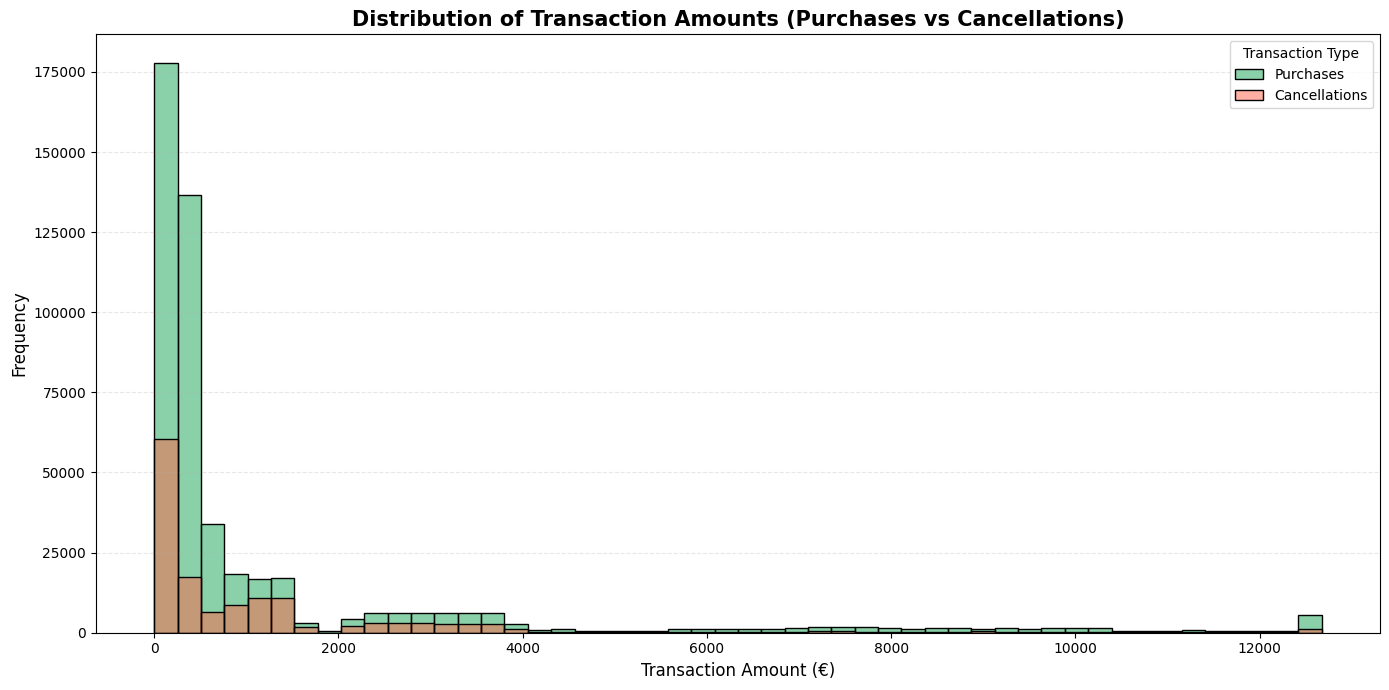

In [ ]:
#Distribution of transaction amount (Purchases vs Cancellation)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(14, 7))

# Split into purchases and cancellations
purchases = trans_df.loc[trans_df['transaction_type'] == 'PURCHASE', 'amount']
cancellations = -trans_df.loc[trans_df['transaction_type'] == 'CANCELLATION', 'amount']  # make positive for comparison

# Clip outliers for readability
lo, hi = purchases.quantile([0.01, 0.99])
purchases_clip = purchases.clip(lo, hi)
cancellations_clip = cancellations.clip(lo, hi)

# Plot both histograms
sns.histplot(purchases_clip, bins=50, color='mediumseagreen', label='Purchases', alpha=0.6)
sns.histplot(cancellations_clip, bins=50, color='tomato', label='Cancellations', alpha=0.5)

plt.title("Distribution of Transaction Amounts (Purchases vs Cancellations)", fontsize=15, fontweight='bold')
plt.xlabel("Transaction Amount (€)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Transaction Type")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### **Distribution of Transaction Amounts (Purchases vs Cancellations)**

The histogram shows that most transaction amounts—both purchases and cancellations—are concentrated below €2,000, with a long tail extending towards higher-value events. Purchases dominate the distribution, reflecting the natural rate at which customers add new products compared to cancellations.

- A large number of transactions fall between €0–€500, driven by products like credit cards, savings, and digital services.

- Higher-value purchases (over €10,000) are mainly due to mortgage and long-term deposit events.

- The bank can interpret this as evidence that most product interactions occur at low monetary values, while a small number of high-value financial products contribute significantly to total portfolio movement.

/tmp/ipython-input-3998945870.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


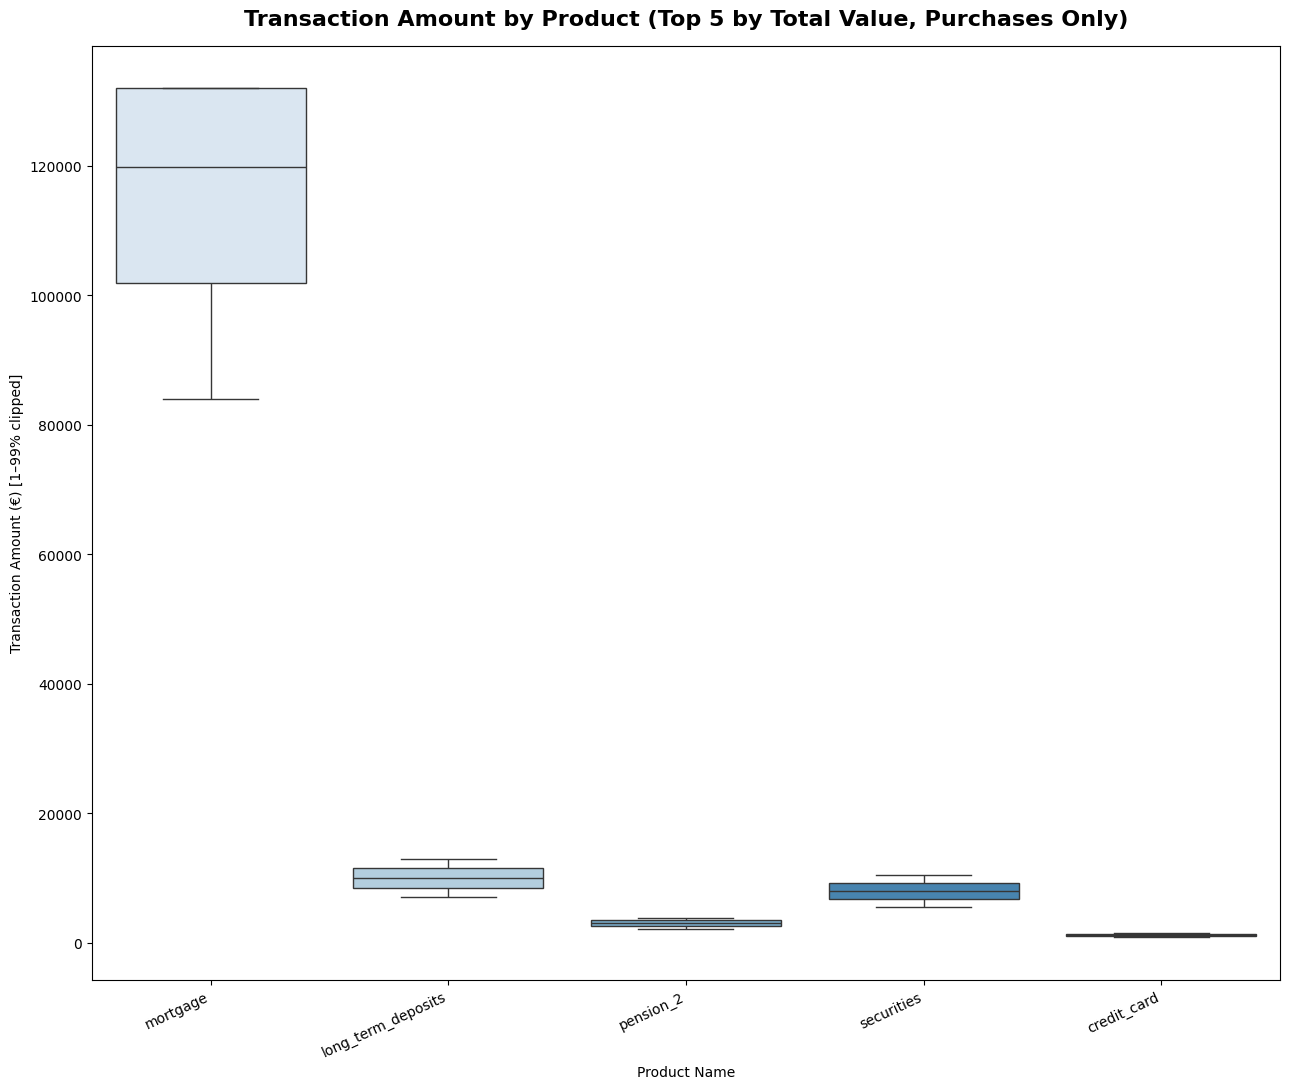

In [ ]:
#Transaction amount by product type (with clipping outliers)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Select top 5 products by total purchase value
top_products = (
    trans_df[trans_df['amount'] > 0]
    .groupby('product_name')['amount']
    .sum()
    .nlargest(5)
    .index
)

# --- Filter dataset to those top 5 and only purchases
sub = trans_df.loc[
    (trans_df['product_name'].isin(top_products)) &
    (trans_df['amount'] > 0)
].copy()

# --- Clip extreme outliers for visualization clarity
q1, q99 = sub['amount'].quantile([0.01, 0.99])
sub['amount_clip'] = sub['amount'].clip(q1, q99)

# --- Draw boxplot
plt.figure(figsize=(13, 11))
sns.boxplot(
    data=sub,
    x='product_name',
    y='amount_clip',
    order=top_products,
    showfliers=False,
    palette='Blues'
)
plt.title("Transaction Amount by Product (Top 5 by Total Value, Purchases Only)", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Product Name")
plt.ylabel("Transaction Amount (€) [1–99% clipped]")
plt.xticks(rotation=25, ha='right')
plt.tight_layout()
plt.show()




### **Transaction Amount by Product (Top 5 by Total Value)**

The boxplot highlights the value distribution of the top five products based on total purchase amounts:

- Mortgage transactions show the highest median and the widest spread (approx. €84,000–€156,000), confirming their major revenue contribution.

- Long-term deposits center around €9,000–€13,000.

- Securities cluster around €7,000–€10,000.

- Pensions and credit cards show much smaller ranges around €2,000–€4,000 and €800–€1,600, respectively.

This distribution shows that although mortgages occur less frequently, they account for the highest portion of value—an important insight for prioritizing recommendation and retention strategies.

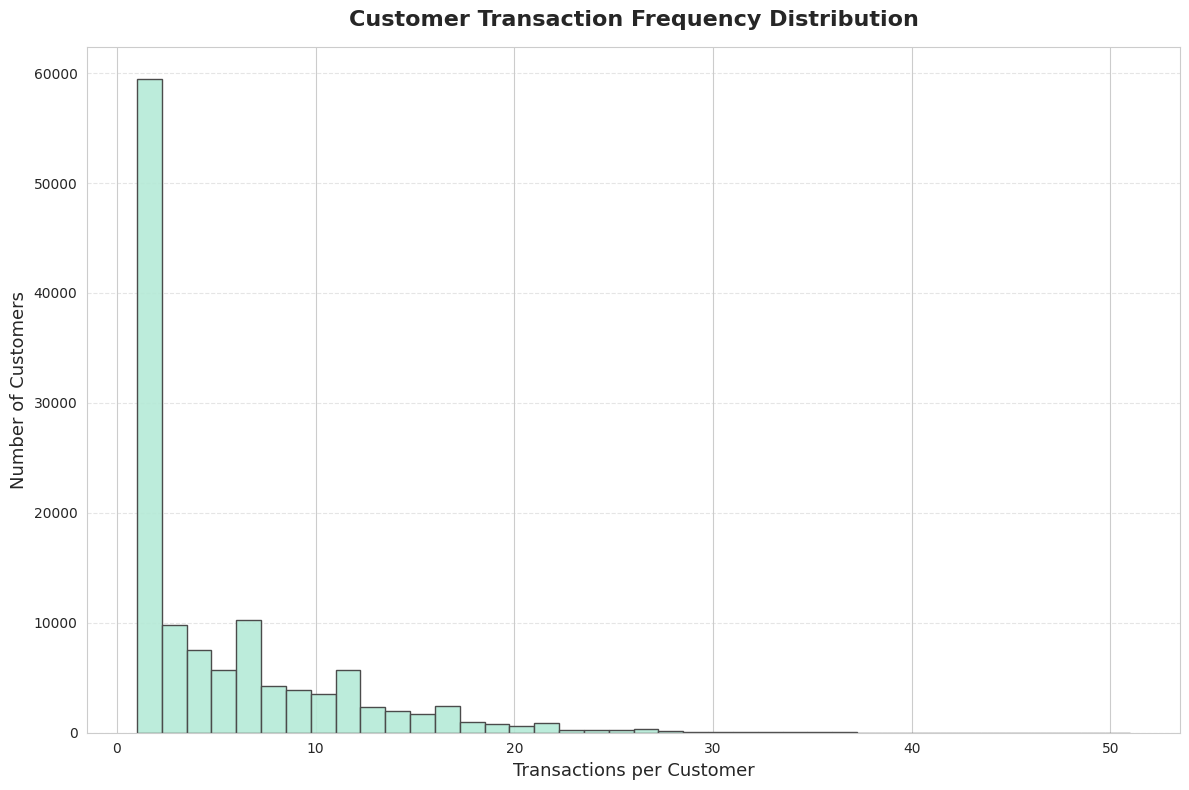

In [ ]:
#Customer transaction frequency distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Customer transaction frequency
tx_freq = trans_df.groupby('customer_id')['transaction_id'].count().rename('txn_count')

# Set clean pastel style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.histplot(
    tx_freq,
    bins=40,
    kde=False,
    color="#B5EAD7",      # pastel green (soft mint tone)
    edgecolor="#4B4B4B",  # subtle dark gray for separation
    alpha=0.9
)

plt.title("Customer Transaction Frequency Distribution", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Transactions per Customer", fontsize=13)
plt.ylabel("Number of Customers", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



### **Customer Transaction Frequency Distribution**

The histogram shows that:

- Most customers have 1–3 transactions, representing a large share of the population (~45–50%).

- A smaller percentage of customers have 10+ transactions, and only a few exceed 30 transactions.

This tells the bank that the customer base consists largely of low-activity or event-driven users, while a smaller group of high-frequency interactors may represent more engaged or financially complex clients.

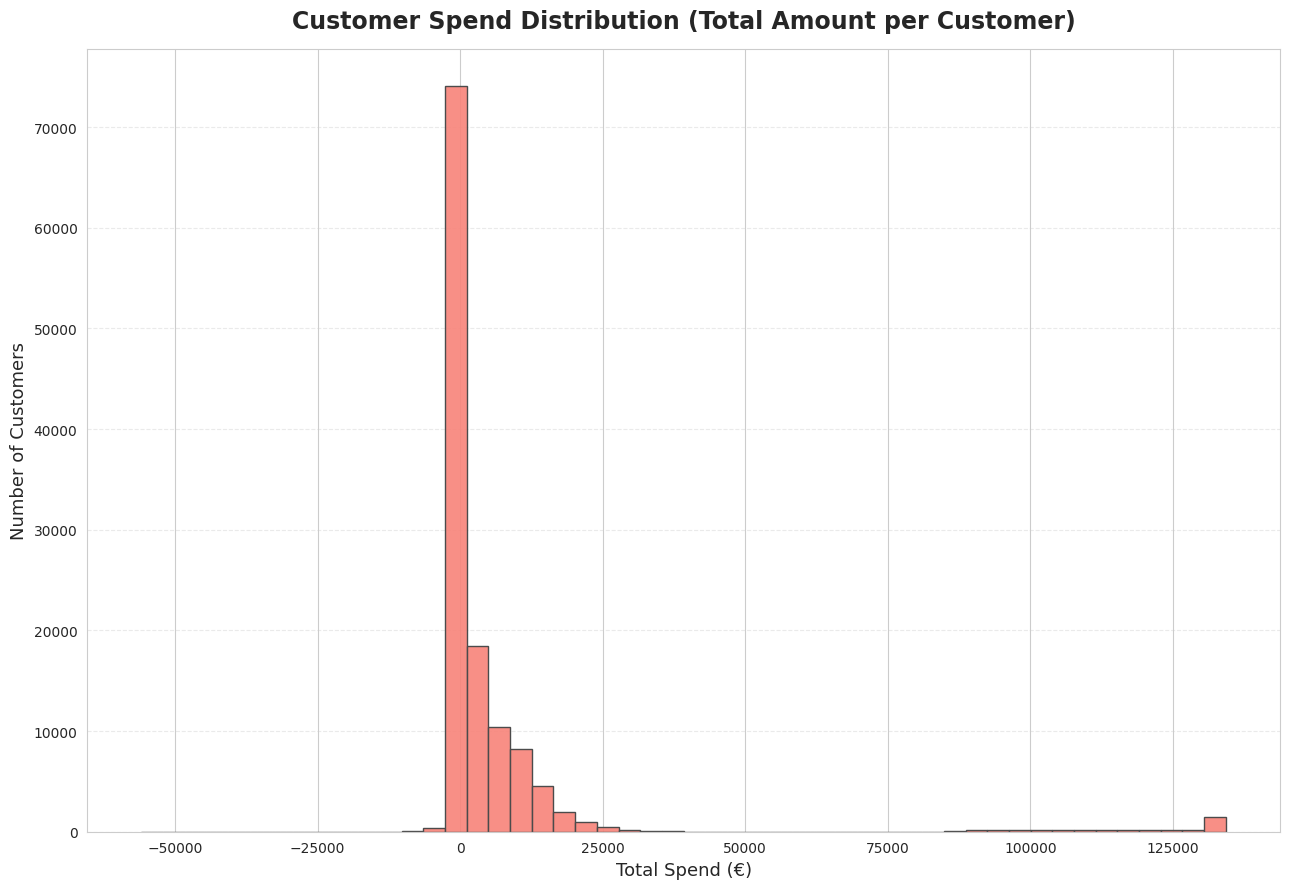

In [ ]:
#Customer spend distribution (sum of amount per customer)
import matplotlib.pyplot as plt
import seaborn as sns

# Customer spend distribution (sum of amount per customer)
cust_spend = trans_df.groupby('customer_id')['amount'].sum()

plt.figure(figsize=(13, 9))
sns.histplot(
    cust_spend.clip(upper=cust_spend.quantile(0.99)),
    bins=50,
    kde=False,
    color="#F88379",      # soft coral color
    edgecolor="#4B4B4B",  # subtle outline
    alpha=0.9
)

plt.title("Customer Spend Distribution (Total Amount per Customer)", fontsize=17, fontweight='bold', pad=15)
plt.xlabel("Total Spend (€)", fontsize=13)
plt.ylabel("Number of Customers", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()



### **Customer Spend Distribution (Total Amount per Customer)**

Total spending per customer exhibits a right-skewed distribution:

- Many customers have total spend values close to €0–€5,000.

- A small number of customers show spend totals exceeding €50,000–€120,000, primarily due to mortgage or investment product purchases.

Banks can interpret this as:

- Most customers contribute modest transactional value, but

- High-value customers, though few in number, have a disproportionate impact on portfolio value.

This helps identify candidates for premium services, personalized financial planning, or tailored investment campaigns.

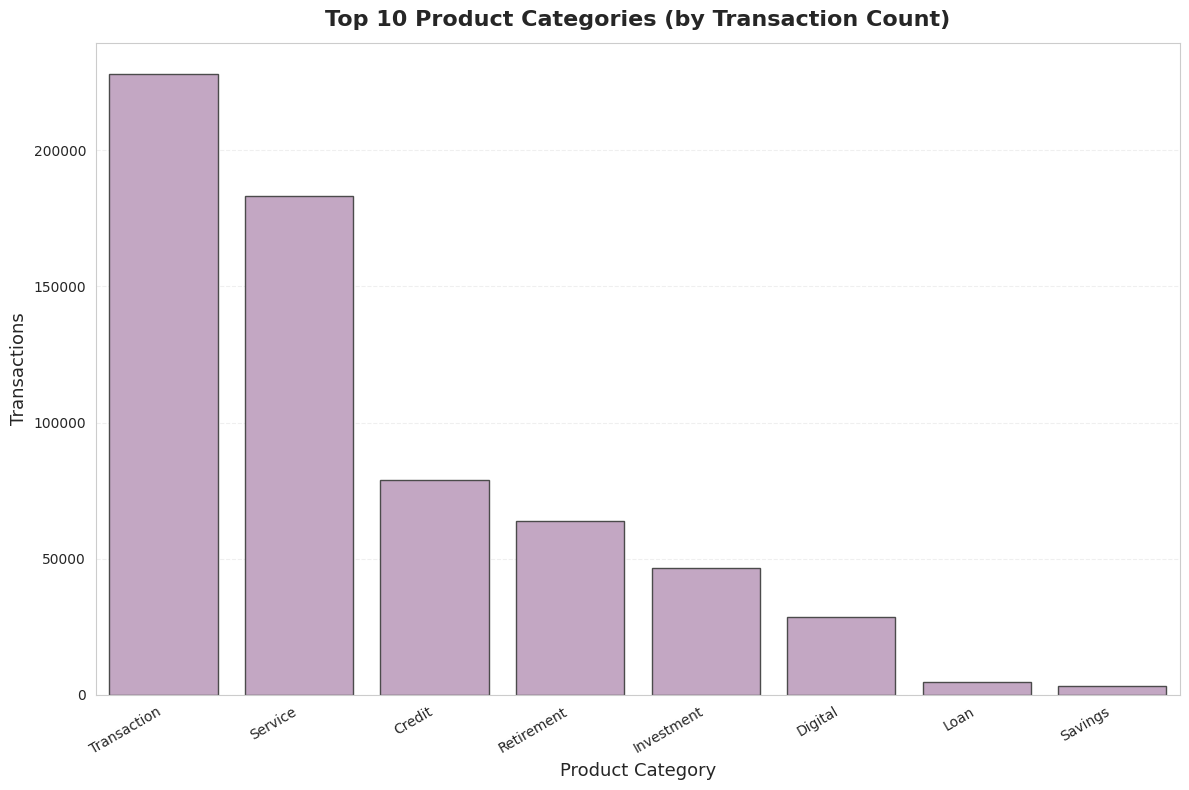

In [ ]:
#⁠Top 10 product categories
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 product categories by transaction count
top_cats = trans_df['product_category'].value_counts().head(10)

# Set Seaborn pastel theme
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_cats.index,
    y=top_cats.values,
    color="#C8A2C8",      # lilac pastel
    edgecolor="#4B4B4B"   # soft dark outline for clarity
)

plt.title("Top 10 Product Categories (by Transaction Count)",
          fontsize=16, fontweight='bold', pad=12)
plt.xlabel("Product Category", fontsize=13)
plt.ylabel("Transactions", fontsize=13)
plt.xticks(rotation=30, ha='right')

# Subtle grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


### **Top 10 Product Categories (by Transaction Count)**

The bar chart shows the transaction volume across product categories:

- Transaction-related services (e.g., current accounts, changes in debit arrangements) lead with 225,000+ events.

- Service products (direct debit, payroll services) follow with 180,000+ events.

- Credit products, retirement, and investment products follow in descending order.

- Loan and Savings categories record the lowest number of transactions.

This breakdown shows that:

- Most interactions involve routine or operational banking services.

- Investment and retirement products have lower frequency but higher monetary value.

- This helps the bank understand customer priorities and design personalized product pathways.

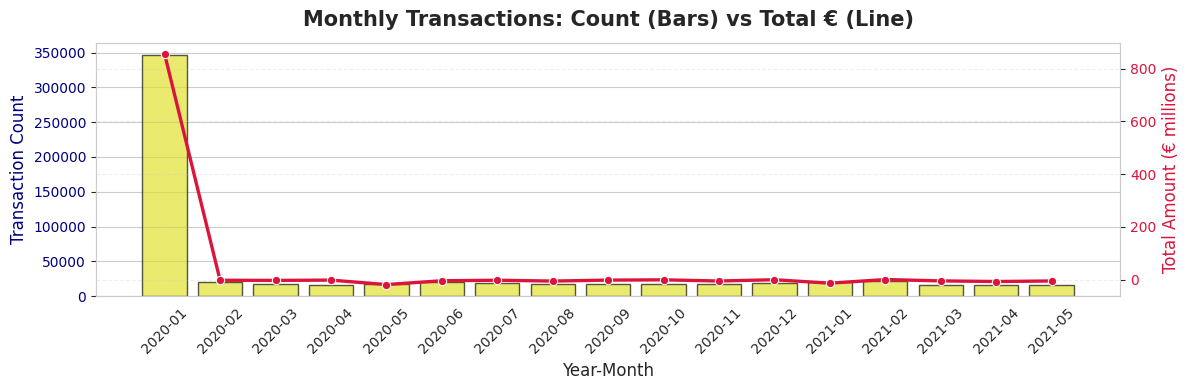

In [ ]:
# =====================================================
# BUILD month_summary FROM trans_df (counts + totals)
# =====================================================
import pandas as pd

# Make sure transaction_date is datetime
trans_df['transaction_date'] = pd.to_datetime(trans_df['transaction_date'], errors='coerce')

# Year-month key (YYYY-MM)
trans_df['ym'] = trans_df['transaction_date'].dt.to_period('M').astype(str)

# Aggregate: transaction count and total € amount (net: cancellations are negative)
month_summary = (
    trans_df.groupby('ym', as_index=False)
            .agg(txn_count=('transaction_id', 'count'),
                 total_amount=('amount', 'sum'))
)

# Ensure chronological order
month_summary['ym_dt'] = pd.to_datetime(month_summary['ym'] + '-01')
month_summary = month_summary.sort_values('ym_dt').reset_index(drop=True)

# =====================================================
# PLOT: Monthly Txn Count (bars) vs Total € (line)
# =====================================================
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 4))

# Bars: transaction counts
sns.barplot(
    data=month_summary,
    x='ym', y='txn_count',
    color='yellow', alpha=0.65, edgecolor='black',
    ax=ax1
)
ax1.set_xlabel("Year-Month", fontsize=12)
ax1.set_ylabel("Transaction Count", color='navy', fontsize=12)
ax1.tick_params(axis='y', labelcolor='navy')
ax1.tick_params(axis='x', rotation=45)

# Line: total € in millions (secondary axis)
ax2 = ax1.twinx()
month_summary['total_millions'] = month_summary['total_amount'] / 1e6
sns.lineplot(
    data=month_summary,
    x='ym', y='total_millions',
    color='crimson', marker='o', linewidth=2.4,
    ax=ax2
)
ax2.set_ylabel("Total Amount (€ millions)", color='crimson', fontsize=12)
ax2.tick_params(axis='y', labelcolor='crimson')

plt.title("Monthly Transactions: Count (Bars) vs Total € (Line)",
          fontsize=15, fontweight='bold', pad=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



### **Monthly Transactions: Count (Bars) vs Total € (Line)**

The year-month plot highlights clear temporal dynamics:

- January 2020 shows a sharp spike with ~350,000 transactions, representing the snapshot transition point.

- After the initial peak, monthly transactions stabilize around 20,000–30,000 events.

- Total monthly transaction value follows a similar pattern, reflecting customer cycles in savings, payrolls, yearly renewals, and financial planning.

Banks can use these patterns to forecast when customers are most receptive to product offers—for example, early-year campaigns aligning with financial resets.

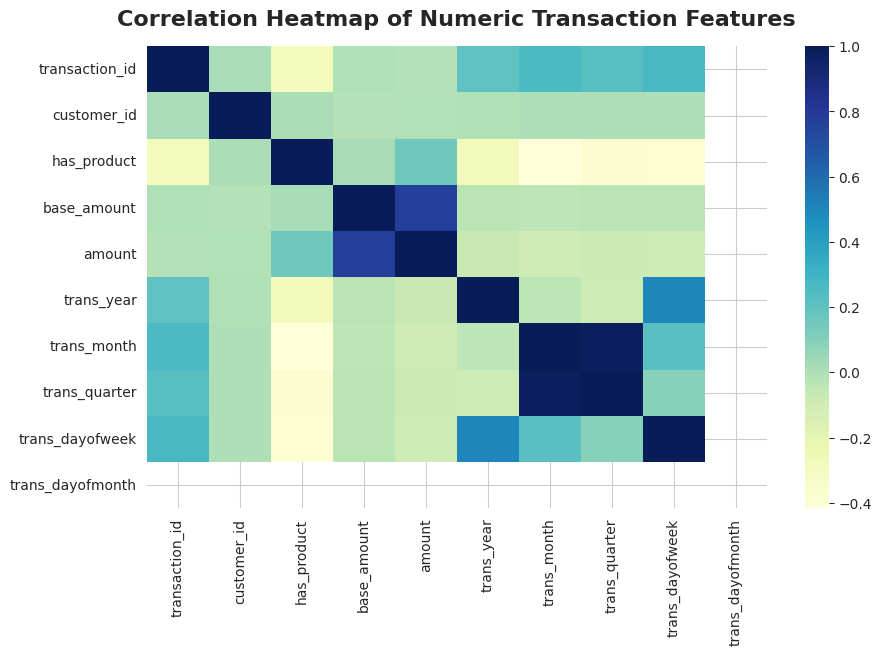

In [ ]:
#Correlation Heatmap (Numeric Variables)
plt.figure(figsize=(10,6))
sns.heatmap(transaction_df.corr(numeric_only=True), cmap='YlGnBu', annot=False)
plt.title('Correlation Heatmap of Numeric Transaction Features', fontsize=16, fontweight='bold', pad=15)
plt.show()


### **Correlation Heatmap of Numeric Transaction Features**

The numeric feature correlation matrix shows:

- Strong correlation between amount and base_amount, confirming the integrity of the synthetic value-generation process.

- Time-based features (year, month, quarter) correlate in expected patterns.

- Very low correlation among behavioral variables indicates diverse product interactions, supporting the use of behavior-based segmentation over demographic clustering.

This confirms that customer behavior is multi-dimensional and not driven by a single dominant factor.

/tmp/ipython-input-3930363420.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


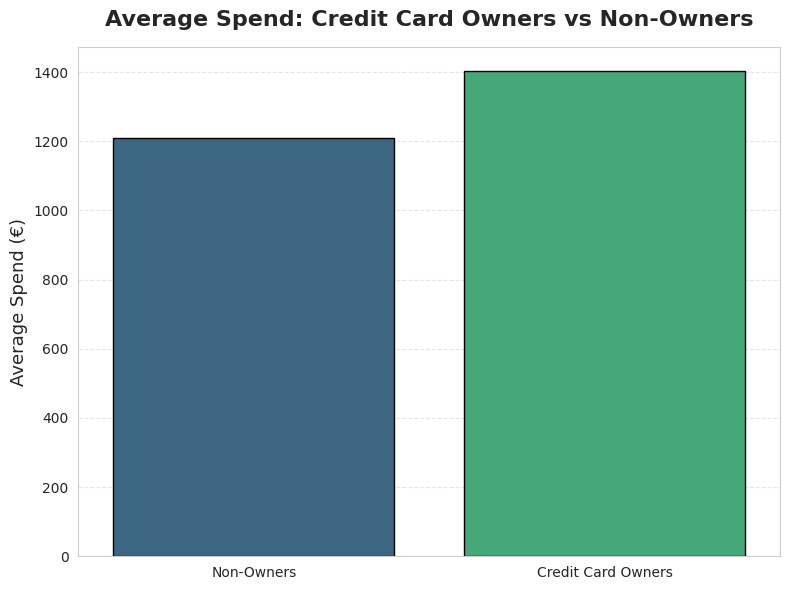

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Recreate cust_agg if not already in memory ---
def has_keyword_any(row, kw):
    for col in ['product_type', 'product_category', 'product_name']:
        val = row.get(col)
        if pd.notna(val) and kw in str(val).lower():
            return True
    return False

df_flags = trans_df.copy()
df_flags['is_credit_card'] = df_flags.apply(lambda r: has_keyword_any(r, 'card'), axis=1)
df_flags['is_loan'] = df_flags.apply(lambda r: has_keyword_any(r, 'loan'), axis=1)

cust_agg = df_flags.groupby('customer_id').agg(
    total_spend=('amount', 'sum'),
    avg_spend=('amount', 'mean'),
    txn_count=('transaction_id', 'count'),
    credit_card_owner=('is_credit_card', 'max'),
    loan_owner=('is_loan', 'max')
).reset_index()

# Compute averages for owners vs non-owners ---
group_stats = (
    cust_agg.groupby('credit_card_owner')['avg_spend']
    .mean()
    .reset_index()
    .replace({True: 'Credit Card Owners', False: 'Non-Owners'})
)

# Comparison Bar Chart ---
plt.figure(figsize=(8,6))
sns.barplot(
    data=group_stats,
    x='credit_card_owner',
    y='avg_spend',
    palette='viridis',  # distinct blue & orange
    edgecolor='black'
)

plt.title("Average Spend: Credit Card Owners vs Non-Owners", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel("Average Spend (€)", fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## **Average Spend: Credit Card Owners vs Non-Owners**

Credit card owners have slightly higher average spend:

- Non-owners: ~€1,210

- Owners: ~€1,400

This suggests that customers who adopt credit cards tend to engage more frequently or transact at higher values.

/tmp/ipython-input-3209881464.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_stats_loan, x='loan_owner', y='avg_spend', palette='viridis', edgecolor='black')


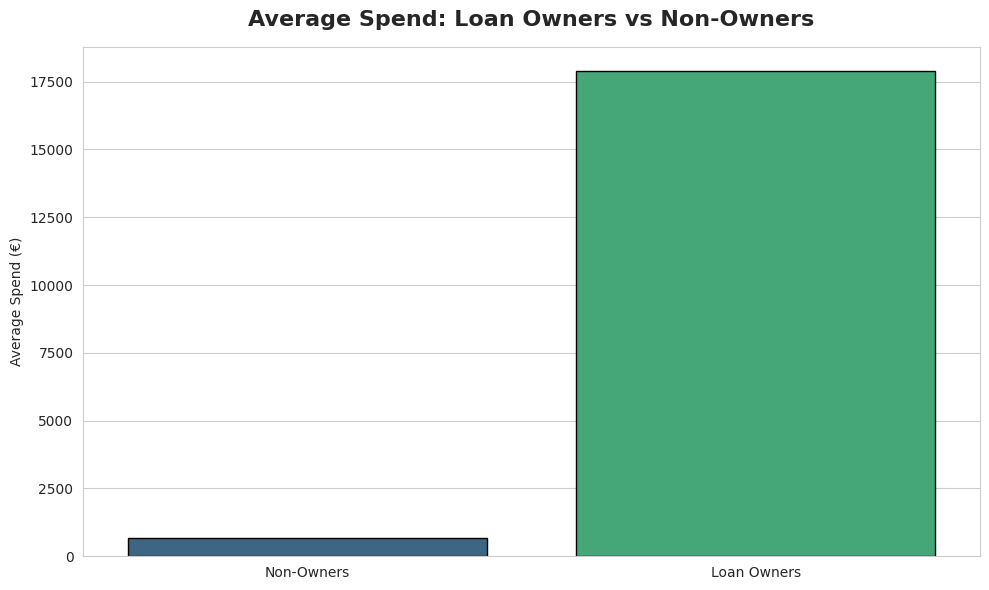

In [ ]:
#Average Spend Among Loan Owners Only
# Filter only customers who own loans
loan_owners = cust_agg[cust_agg['loan_owner'] == True]

#Compare Loan Owners vs Loan Non-Owners
group_stats_loan = (
    cust_agg.groupby('loan_owner')['avg_spend']
    .mean()
    .reset_index()
    .replace({True: 'Loan Owners', False: 'Non-Owners'})
)

plt.figure(figsize=(10,6))
sns.barplot(data=group_stats_loan, x='loan_owner', y='avg_spend', palette='viridis', edgecolor='black')
plt.title("Average Spend: Loan Owners vs Non-Owners",  fontsize=16, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel("Average Spend (€)")
plt.tight_layout()
plt.show()


### **Average Spend: Loan Owners vs Non-Owners**

A clear contrast appears here:

- Loan owners show an average spend of €17,800+,

- Whereas non-owners average €650–€800.

This reflects the high-value nature of loans and reinforces that customers with credit products often represent key financial segments for the bank.

/tmp/ipython-input-3991246457.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_sum, x='credit_card_owner', y='total_spend', palette='viridis', edgecolor='black')


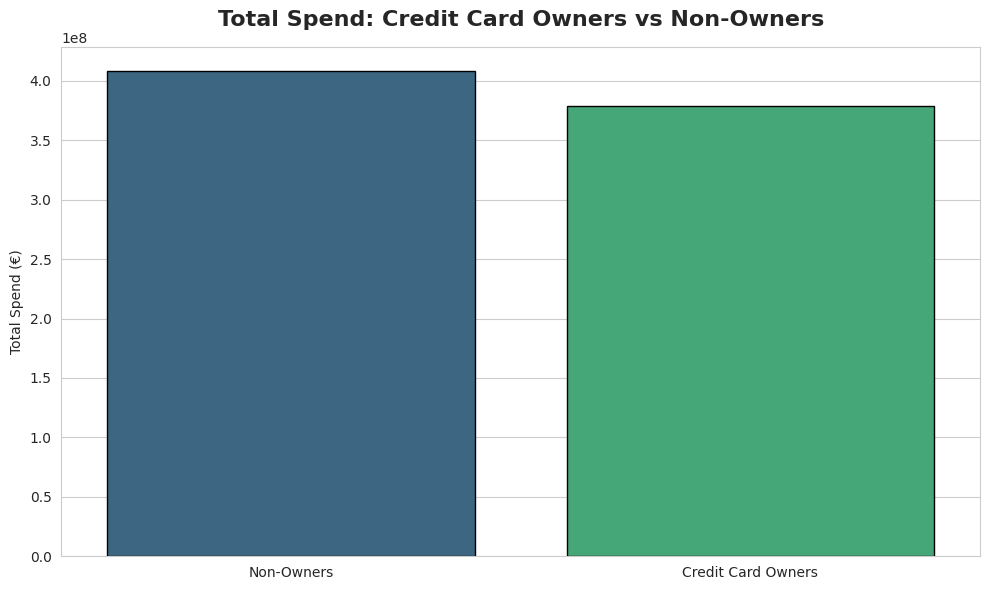

In [ ]:
#Compare Total Spending b/w Credit Card Owners vs Credit Card Non-Owners
group_sum = (
    cust_agg.groupby('credit_card_owner')['total_spend']
    .sum()
    .reset_index()
    .replace({True: 'Credit Card Owners', False: 'Non-Owners'})
)

plt.figure(figsize=(10,6))
sns.barplot(data=group_sum, x='credit_card_owner', y='total_spend', palette='viridis', edgecolor='black')
plt.title("Total Spend: Credit Card Owners vs Non-Owners", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel("Total Spend (€)")
plt.tight_layout()
plt.show()



### **Total Spend: Credit Card Owners vs Non-Owners**

Despite higher per-customer average spend:

- Non-owners collectively spend €410M,

- Owners contribute €380M.

This is because non-owners are more numerous, showing the need to convert high-volume low-value customers into more engaged financial users.

/tmp/ipython-input-2513267167.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=group_sum_loan, x='loan_owner', y='total_spend', palette='viridis', edgecolor='black')


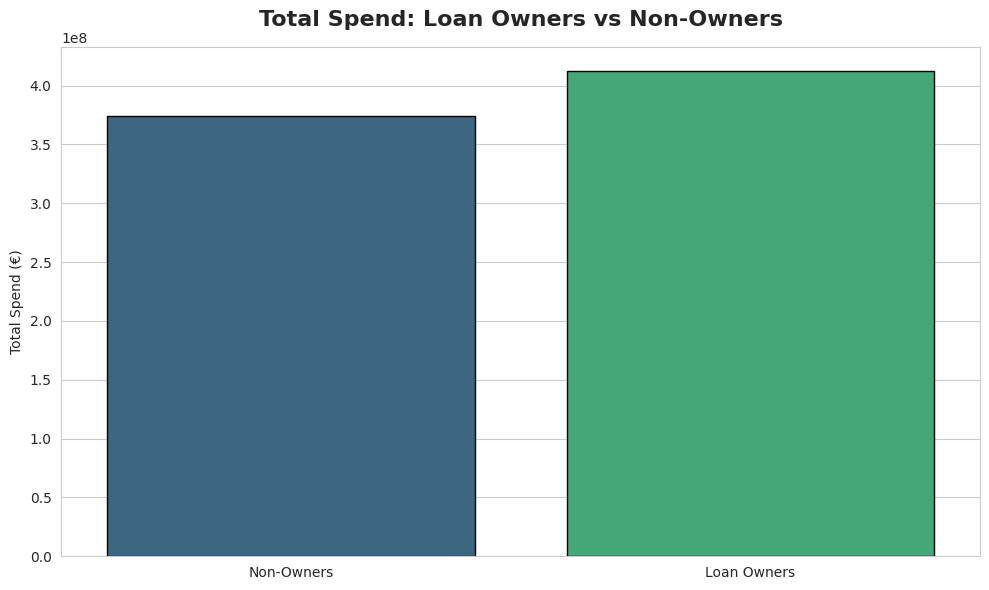

In [ ]:
#Compare Total Spending b/w Loan Owners vs Loan Non-Owners
group_sum_loan = (
    cust_agg.groupby('loan_owner')['total_spend']
    .sum()
    .reset_index()
    .replace({True: 'Loan Owners', False: 'Non-Owners'})
)

plt.figure(figsize=(10,6))
sns.barplot(data=group_sum_loan, x='loan_owner', y='total_spend', palette='viridis', edgecolor='black')
plt.title("Total Spend: Loan Owners vs Non-Owners", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("")
plt.ylabel("Total Spend (€)")
plt.tight_layout()
plt.show()



### **Total Spend: Loan Owners vs Non-Owners**

Although loan owners have a much higher per-customer spend, the total spend distribution reflects both value and population size:

- Loan Owners contribute approximately €412 million in total spend.

- Non-owners contribute around €375 million overall.

This pattern emerges because loan owners make significantly larger-value transactions, while non-owners represent a larger share of the customer population. For the bank, this highlights that loan customers drive substantial financial value, even if they form a smaller subgroup, underscoring the importance of targeted retention and tailored loan-related product strategies.